In [3]:
from __future__ import division
import sys
import argparse
import numpy as np
import pretty_midi
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import datetime
import os

In [4]:
data_pdos.getcwd()+'/musicnet_midis'
data=[]
for path, subdirs, files in os.walk(root):
    sub_dir_str=path.split('/')[-1]
    for name in files:
        sample_path=os.path.join(path, name)
        sample_name=sub_dir_str + '_' + name.split('.')[0]
        try:
            piano_roll_matrix = pretty_midi.PrettyMIDI(sample_path).get_piano_roll(100)
            data.append([sample_name, piano_roll_matrix, sample_path])
        except:
            print('could not read {}'.format(sample_name))
    print('Finito_{}'.format(sub_dir_str))
data_pd=pd.DataFrame(data)

Finito_musicnet_midis
could not read musicnet_midis\Bach_2194_prelude13


c:\users\dudirado\documents\github\myportfolio\venv\lib\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


could not read musicnet_midis\Bach_2211_fugue12
could not read musicnet_midis\Bach_2227_fugue6
could not read musicnet_midis\Bach_2230_prelude20
could not read musicnet_midis\Bach_2292_prelude19
could not read musicnet_midis\Bach_2305_prelude14
could not read musicnet_midis\Bach_2310_prelude15
Finito_musicnet_midis\Bach
Finito_musicnet_midis\Beethoven
Finito_musicnet_midis\Brahms
Finito_musicnet_midis\Cambini
Finito_musicnet_midis\Dvorak
Finito_musicnet_midis\Faure
Finito_musicnet_midis\Haydn
Finito_musicnet_midis\Mozart
Finito_musicnet_midis\Ravel
Finito_musicnet_midis\Schubert


In [6]:
data_pd.head(3)

,0,1,2
0,musicnet_midis\Bach_2186_vs6_1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",C:\Users\DUDIRADO\Documents\GitHub\MyPortfolio...
1,musicnet_midis\Bach_2191_vs6_5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",C:\Users\DUDIRADO\Documents\GitHub\MyPortfolio...
2,musicnet_midis\Bach_2195_fugue3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",C:\Users\DUDIRADO\Documents\GitHub\MyPortfolio...


In [7]:
fsr = 100 #midi sampling frequency
def plot_piano_roll(m, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    midi_data=pretty_midi.PrettyMIDI(m[2])
    librosa.display.specshow(midi_data.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
    plt.title(m[0])
    plt.figure(figsize=(8, 4))

c:\users\dudirado\documents\github\myportfolio\venv\lib\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
c:\users\dudirado\documents\github\myportfolio\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


'0:07:35.440000'

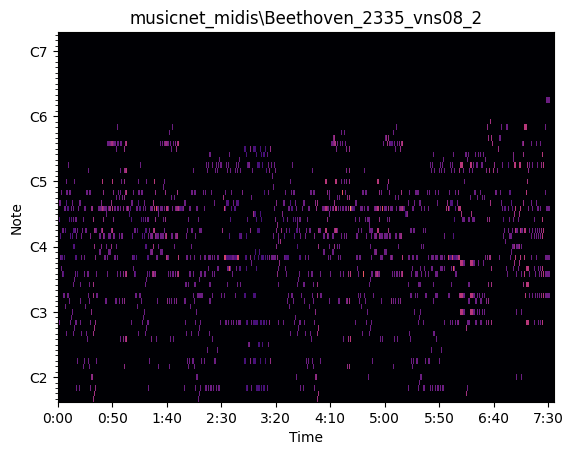

<Figure size 800x400 with 0 Axes>

In [8]:
random_m_idx=np.random.randint(0, high=data_pd.shape[0], size=None, dtype=int)
random_m=data_pd.iloc[random_m_idx]
plot_piano_roll(random_m,32,100)
random_m[0]
len_sec=random_m[1].shape[1]/fsr
str(datetime.timedelta(seconds=len_sec))

In [102]:
class MyDataset():
  def __init__(self,dataframe):  
    self.data=torch.tensor(dataframe[1])
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]


In [103]:
x=MyDataset(data_pd)

ValueError: expected sequence of length 25142 at dim 2 (got 25370)

In [109]:
data_pd[1][1].shape

(128, 25370)